## Titanic DataSet 

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [77]:
TitanicData=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
TitanicData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This dataset has 891 rows and 12 columns. The target variable is Survived. 0 -indicates dead and 1-indicates survived

Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number


In [78]:
TitanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
TitanicData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [80]:
TitanicData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
TitanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are numerical and categorical values present. 
Categorical columns:
Name,Sex,Ticket, Cabin and Embarked

Numeric Column: PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare

In this Survived is the target variable.

In [82]:
TitanicData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age column has 177 null values,cabin has 687 null values and embarked has 2 null values.
As the cabin column has 687 null values, may not impact the Survived rate , hence dropping cabin column.

In [83]:
#Drop column cabin
TitanicData.drop(['Cabin'],axis=1,inplace=True)

In [84]:
TitanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [85]:
TitanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations:

1.In columnn Fare, the mean is greater than median and hence right skewness present.
2.Outliers are present as there is a difference between 75% and max value in Fare,Age columns

## EDA Analysis

# Univariate analysis:

<function matplotlib.pyplot.show(close=None, block=None)>

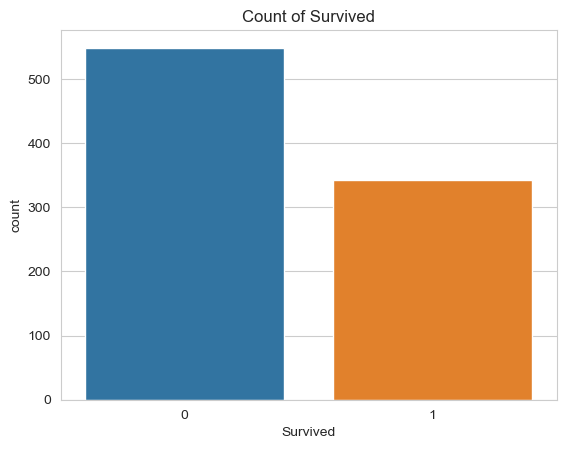

In [86]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=TitanicData)
plt.title('Count of Survived')
plt.show

More than 500 people did not survive and around 300+ people survived. 

In [87]:
TitanicData['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

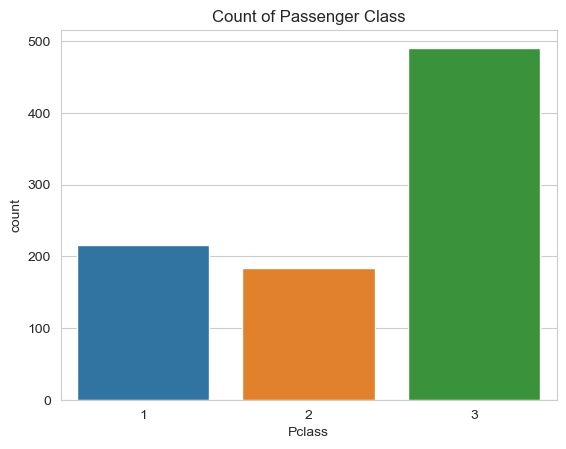

In [88]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',data=TitanicData)
plt.title('Count of Passenger Class')
plt.show

Majority of the people travelled in 3rd class with the count of 491. Next higher count 216 people travelled in 1st class and 184 people travelled in second class.

In [89]:
TitanicData['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

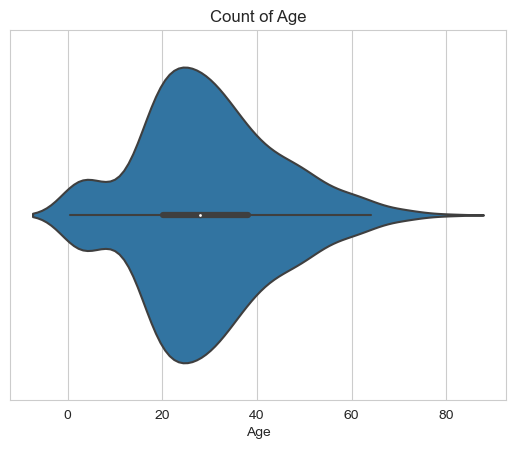

In [90]:

sns.violinplot(x='Age',data=TitanicData)
plt.title('Count of Age')
plt.show

People with middle age count(2o to 40) is higher than that children and aged people count

In [91]:
TitanicData['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

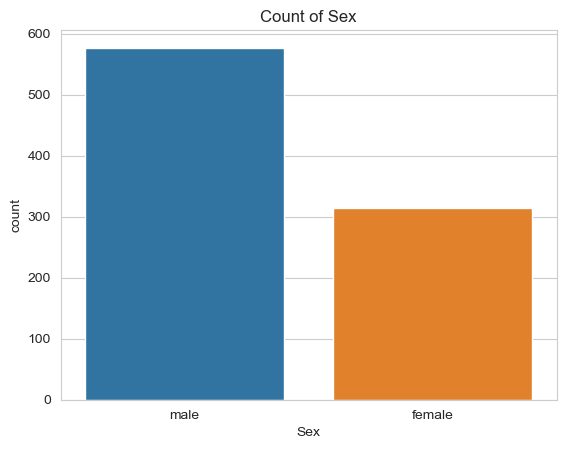

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=TitanicData)
plt.title('Count of Sex')
plt.show

The male count (577) is higher than the female count (314).

In [93]:
TitanicData['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

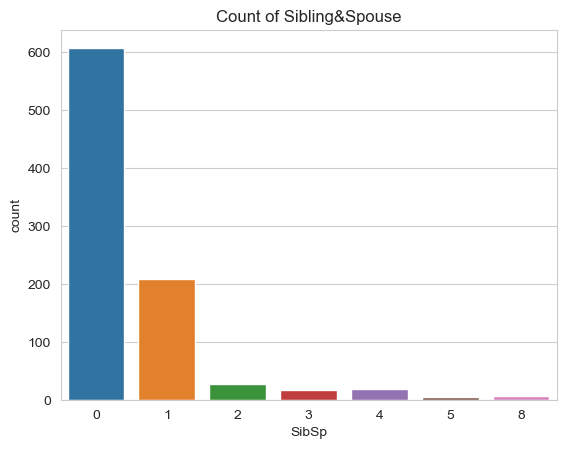

In [94]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=TitanicData)
plt.title('Count of Sibling&Spouse')
plt.show

Around 608 people did not have sibiling or spouse and 209 people has sibiling and spouse.

In [95]:
TitanicData['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

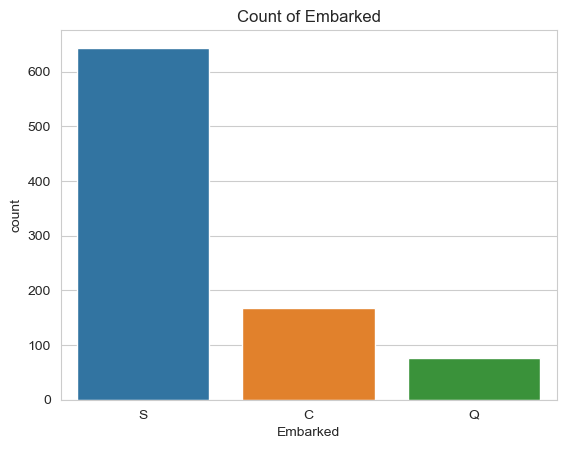

In [96]:
sns.set_style('whitegrid')
sns.countplot(x='Embarked',data=TitanicData)
plt.title('Count of Embarked')
plt.show

S-Southampton, C- Cherbourg, and Q- Queenstown.

Around 684 people boarded from Southampton,168 boarded from Cherbourg and the rest boarded from Queenstown.

In [97]:
TitanicData['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

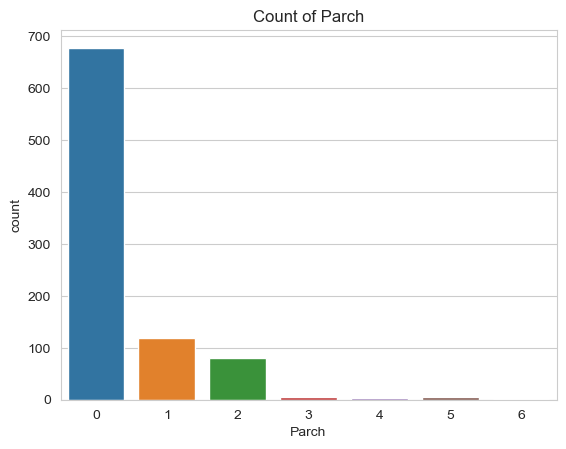

In [98]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',data=TitanicData)
plt.title('Count of Parch')
plt.show

The children travelled with nanny count is higher than the others


# Bivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

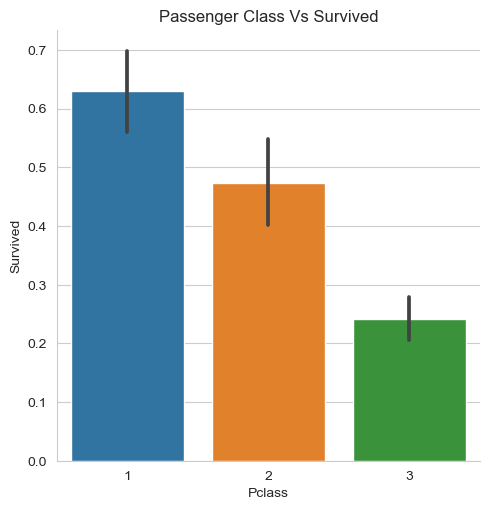

In [99]:
sns.catplot(x='Pclass',y='Survived',data=TitanicData,kind='bar')
plt.title('Passenger Class Vs Survived')
plt.show

Observation:
    The survived rate in 1st class is higher than the other two classes

<function matplotlib.pyplot.show(close=None, block=None)>

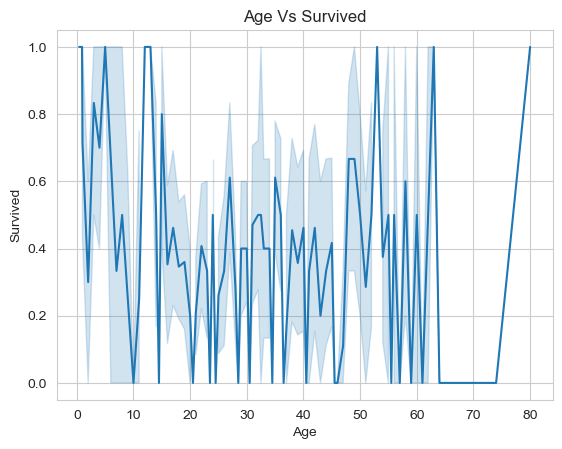

In [100]:
sns.lineplot(x='Age',y='Survived',data=TitanicData)
plt.title('Age Vs Survived')
plt.show

The children and aged people survived than the middle aged people(20 to 50)

In [101]:
TitanicData['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

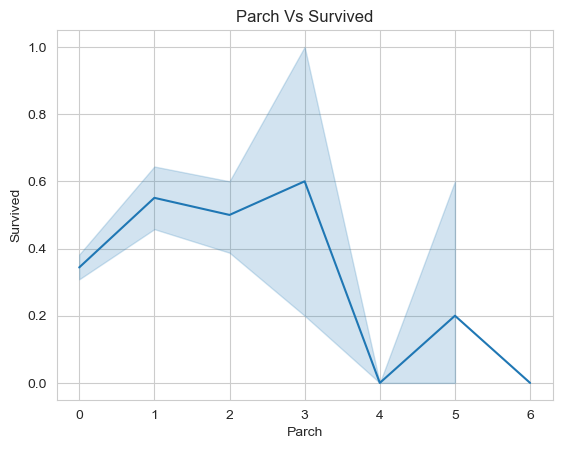

In [102]:
sns.lineplot(x='Parch',y='Survived',data=TitanicData)
plt.title('Parch Vs Survived')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

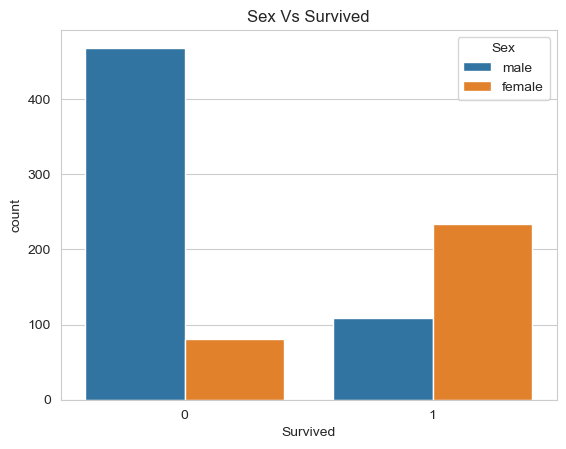

In [103]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=TitanicData)
plt.title('Sex Vs Survived')
plt.show

Most of the male(around 450+) and less female(85+) are not survied . Most of the female(220+) and less male(100-110) survived.

<Axes: xlabel='Survived', ylabel='count'>

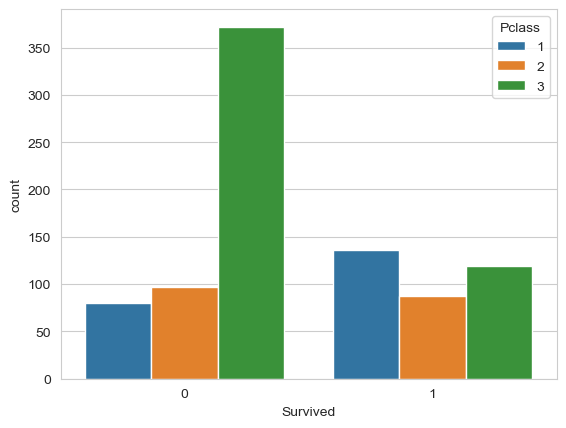

In [104]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=TitanicData)

The passenger class with 3rd class(350+) did not survived.

# Distribution of skewness

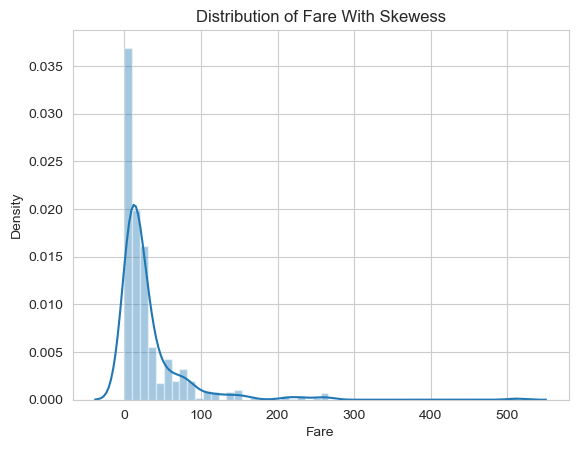

In [105]:
sns.distplot(TitanicData['Fare'],kde="true")
plt.title('Distribution of Fare With Skewess')
plt.show()

Right Skewness present in the data. Also the fare is around 20 to 50.

<function matplotlib.pyplot.show(close=None, block=None)>

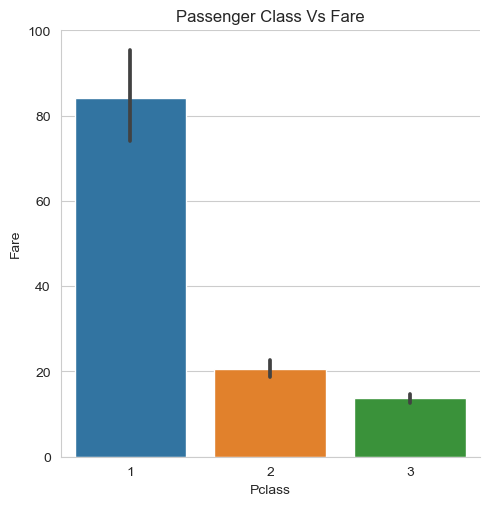

In [106]:
sns.catplot(x='Pclass',y='Fare',data=TitanicData,kind='bar')
plt.title('Passenger Class Vs Fare')
plt.show

The fare for 1st class is high when compared to other classes.

<Axes: xlabel='Age', ylabel='Density'>

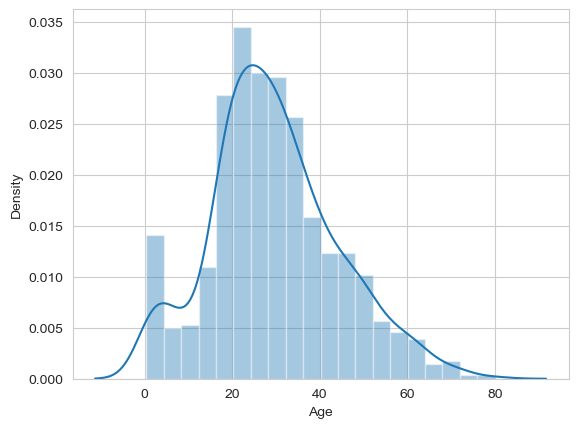

In [107]:
sns.distplot(TitanicData['Age'],kde="true")

People with age 20 to 30 people travelled when compared to other category.

# Plotting Outliers



<Axes: >

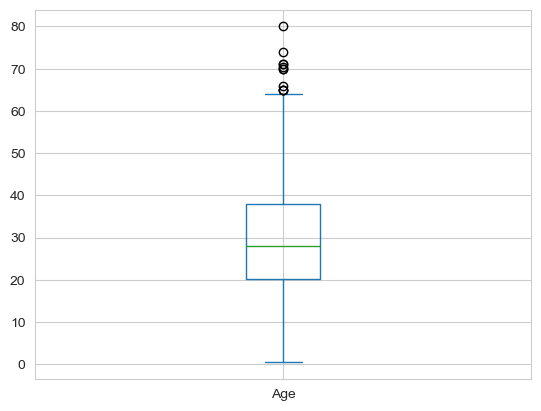

In [108]:
TitanicData['Age'].plot.box()

<Axes: >

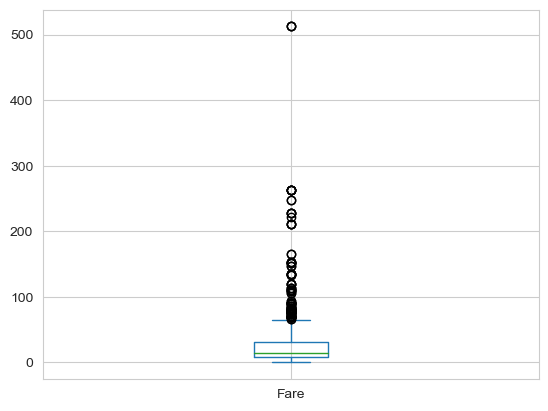

In [109]:
TitanicData['Fare'].plot.box()

PassengerId       Axes(0.125,0.53;0.0824468x0.35)
Survived       Axes(0.223936,0.53;0.0824468x0.35)
Pclass         Axes(0.322872,0.53;0.0824468x0.35)
Age            Axes(0.421809,0.53;0.0824468x0.35)
SibSp          Axes(0.520745,0.53;0.0824468x0.35)
Parch          Axes(0.619681,0.53;0.0824468x0.35)
Fare           Axes(0.718617,0.53;0.0824468x0.35)
dtype: object

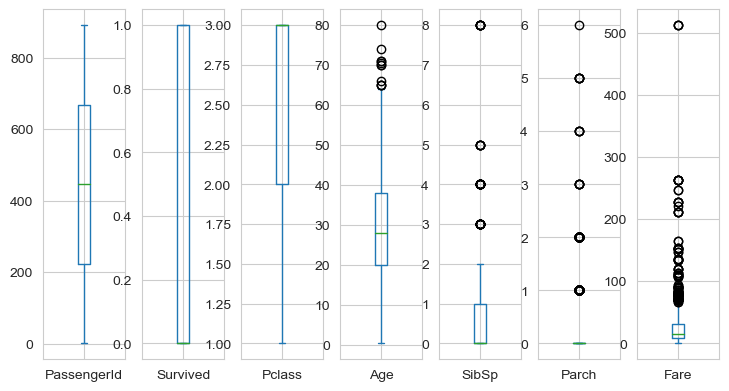

In [110]:
TitanicData.plot(kind='box',subplots=True,layout=(2,8),figsize=(10,10))

 Outliers are present in the Age, Fare,Sibsp and Parch columns

## Data Cleaning and Preprocessing

In [111]:
#Filling Null values for Age 
TitanicData['Age']=TitanicData['Age'].fillna(TitanicData['Age'].mean())

In [112]:
#Filling Null values for Embarked 

TitanicData['Embarked'].fillna(TitanicData['Embarked'].value_counts().index[0], inplace=True)




In [113]:
TitanicData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All the null values are removed now. 

In [114]:
TitanicData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


###### Converting Categorical data into Numerical Data

In [115]:
Le=LabelEncoder()
TitanicData['Sex']=Le.fit_transform(TitanicData['Sex'])
TitanicData['Embarked']=Le.fit_transform(TitanicData['Embarked'])


In [116]:
TitanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


Dropping the columns which does not impact the target variable

Ticket and Name - String values does not impact the target variable



In [117]:
TitanicData.drop(['Name','Ticket'],axis=1,inplace=True)

In [118]:
TitanicData.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [119]:
TitanicData.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


<Axes: >

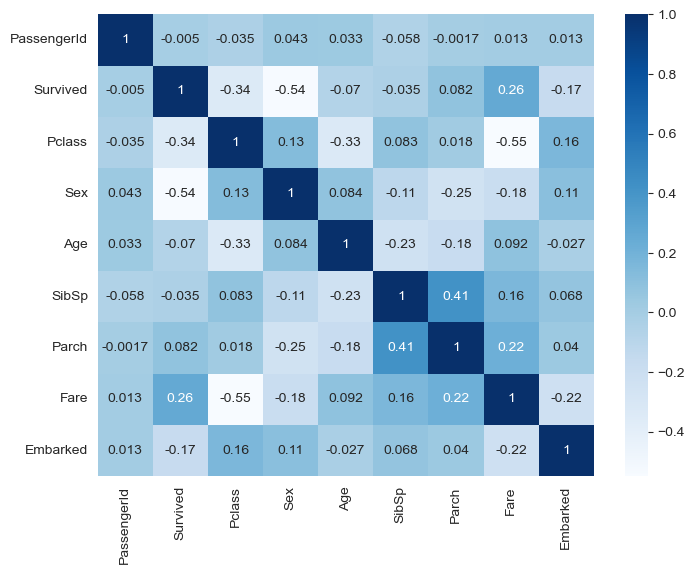

In [120]:
plt.figure(figsize=(8,6))
sns.heatmap(TitanicData.corr(),cmap='Blues',annot=True)

### Removing Outliers

In [121]:
from scipy.stats import zscore
z=np.abs(zscore(TitanicData))
threshold=3
TitanicData=TitanicData[(z<3).all(axis=1)]
TitanicData


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


# Splitting the Data

In [122]:
x=TitanicData.drop(['Survived'],axis=1)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


In [123]:
y=TitanicData.iloc[:,1]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [124]:
y.value_counts()

Survived
0    500
1    320
Name: count, dtype: int64

#### Applying SMOTE to balance the data

In [125]:
from imblearn.over_sampling import SMOTE
target = SMOTE()
x,y= target.fit_resample(x,y)

In [126]:
y.value_counts()

Survived
0    500
1    500
Name: count, dtype: int64

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=45)



In [128]:
x_train.shape


(700, 8)

In [129]:
x_test.shape


(300, 8)

In [130]:
y_train.shape


(700,)

In [131]:
y_test.shape

(300,)

## Model Prediction

In [207]:
Lg=LogisticRegression()
dtc=DecisionTreeClassifier(criterion='entropy')
gnb=GaussianNB()
ada = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier()

model=(Lg,dtc,gnb,ada,rfc,gb)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of',m,)
    print(accuracy_score(y_test,predict))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))

Accuracy Score of LogisticRegression()
0.8266666666666667
[[126  24]
 [ 28 122]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       150
           1       0.84      0.81      0.82       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

Accuracy Score of DecisionTreeClassifier(criterion='entropy')
0.7733333333333333
[[112  38]
 [ 30 120]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       150
           1       0.76      0.80      0.78       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300

Accuracy Score of GaussianNB()
0.8
[[119  31]
 [ 29 121]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     

##### The model Random Forest Classifier works best with  whaccuracy score of 84% when compared to other models.

Accuracy Score of RandomForestClassifier(random_state=42)
0.8466666666666667
[[128  22]
 [ 24 126]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       150
           1       0.85      0.84      0.85       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

In [219]:
def Survivalpredict(ts):
    ts=ts.reshape(1,-1)
    pred=rfc.predict(ts)
    print("Predicted Value:",pred)
    if (pred==0):
        print("The Person did not Survived")
    else:
        print("The Person Survived")

In [220]:
ts=np.array([1,3,1,22.08,1,0,7.25,2])
Survivalpredict(ts)

Predicted Value: [0]
The Person did not Survived


#### Saving the Best Model

In [133]:
import joblib
joblib.dump(rfc,'rfcfile.obj')#Serialization
dtc_from_joblib=joblib.load('rfcfile.obj')
dtc_from_joblib.predict(x_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1], d

### AUC ROC Curve

In [134]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

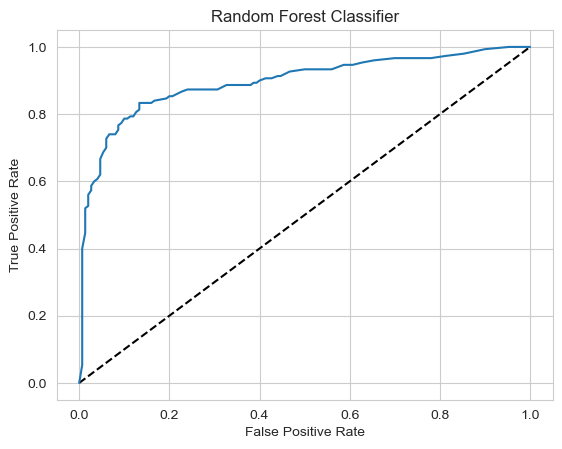

In [135]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()